# STOR 320 Homework 6 Cross Validation

Please submit the solution to gradescope by 11:59 PM, Nov 21, Thursday.

**Name**: Conor Jones

**PID**: 730665579


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer

In [3]:
ames = pd.read_feather('cleaned_ames.feather')
ames

,LogSalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PreCast,Stone,Stucco,VinylSd,WdSdng,WdShing,WdShng,YearsSince1950Built,YearsSince1950Remod,YearsSince1950GarageBuilt
0,12.278393,20,RL,141.0,31770.0,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,10,10,10.0
1,11.561716,20,RH,80.0,11622.0,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,11,11,11.0
2,12.055250,20,RL,81.0,14267.0,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,0,0,1,0,0,8,8,8.0
3,12.404924,20,RL,93.0,11160.0,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,18,18,18.0
4,12.154253,60,RL,74.0,13830.0,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,0,1,0,0,0,47,48,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,11.782953,20,RL,160.0,20000.0,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,0,1,0,0,0,10,46,10.0
2925,11.867097,80,RL,37.0,7937.0,Pave,NoAccess,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,34,34,34.0
2926,11.782953,20,RL,0.0,8885.0,Pave,NoAccess,IR1,Low,AllPub,...,0,0,0,0,0,0,0,33,33,33.0
2928,12.043554,20,RL,77.0,10010.0,Pave,NoAccess,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,24,25,25.0


1. **Load the cleaned Ames dataset. Convert the categorical variables into dummy variables. Display the new `ames` table. How many columns are there? (5 points)**

In [6]:
ames = pd.get_dummies(ames, drop_first=True)
print(ames.shape[1])
ames

329


,LogSalePrice,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_VWD,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12.278393,141.0,31770.0,112.0,639.0,0.0,441.0,1080.0,1656.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,11.561716,80.0,11622.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,12.055250,81.0,14267.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,12.404924,93.0,11160.0,0.0,1065.0,0.0,1045.0,2110.0,2110.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,12.154253,74.0,13830.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,11.782953,160.0,20000.0,0.0,1224.0,0.0,0.0,1224.0,1224.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2925,11.867097,37.0,7937.0,0.0,819.0,0.0,184.0,1003.0,1003.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,11.782953,0.0,8885.0,0.0,301.0,324.0,239.0,864.0,902.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2928,12.043554,77.0,10010.0,0.0,1071.0,123.0,195.0,1389.0,1389.0,0.0,...,False,False,False,False,True,False,False,False,True,False


The ames dataset has 329 columns

2.  **L1 Distance Calculation (5 points)**
   - Define the L1 distance between two rows as the sum of the absolute values of the differences for all features. Calculate the L1 distance between the first and second rows of the dataset.
   
   - For Boolean variables, you can treat `True` as 1 and `False` as 0.

In [8]:
def l1_distance(row1, row2):
    row1 = row1.astype(int)
    row2 = row2.astype(int)
    return np.sum(np.abs(row1 - row2))

l1_dist = l1_distance(ames.iloc[0], ames.iloc[1])
print("L1 distance between the first two rows:", l1_dist)

L1 distance between the first two rows: 23025


3. **Feature Matrix and Target Vector Creation (10 points)**
   - Create a feature matrix `X` by dropping the `LogSalePrice` column from the dataset. Create a target vector `y` using the `LogSalePrice` column. (5 points)
   - Randomly split `X` and `y` into training and test sets with a 70/30 split. Name the training set `X_train` and `y_train`, and the test set `X_test` and `y_test`. Use random seed as `42`. (5 points)

In [9]:
X = ames.drop(columns=['LogSalePrice'])
y = ames['LogSalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

4. **Rescaling the Feature Matrix (5 points)**
   - Rescale the values of `X_train` using a scaler (e.g., `StandardScaler`). Use the same scaling rule to transform `X_test`. Name the transformed sets `X_train_scaled` and `X_test_scaled`.

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

5. **Simple L1 Prediction Model (10 points)**
   - Implement a simple prediction model: For each row in `X_test_scaled`, find the closest row in `X_train_scaled` in terms of L1 distance. Use the corresponding `y` value from `y_train` as the prediction.
   - Create predictions for all observations in `X_test_scaled` and name the prediction array `y_predict`.

In [11]:
def predict_simple_l1(X_train, X_test, y_train):
    predictions = []
    for test_row in X_test:
        distances = np.sum(np.abs(X_train - test_row), axis=1)
        closest_idx = np.argmin(distances)
        predictions.append(y_train.iloc[closest_idx])
    return np.array(predictions)

y_predict = predict_simple_l1(X_train_scaled, X_test_scaled, y_train)

6. **Calculate Out-of-Sample R-squared (OSR2)  (5 points)**
   - Calculate the OSR2 (out-of-sample R-squared) for the predictions from Problem 5.

In [12]:
osr2 = r2_score(y_test, y_predict)
print("OSR2 for the simple L1 prediction model:", osr2)

OSR2 for the simple L1 prediction model: 0.7145260470754282


7. **Flexible L1 Prediction Model (10 points)**
   - Modify the prediction rule: For each row in `X_test_scaled`, find the five closest rows in `X_train_scaled` in terms of L1 distance and use the average `y` value of these five observations as the prediction.
   - Create predictions for all observations in `X_test_scaled` and name the prediction array `y_predict`.

In [13]:
def predict_flexible_l1(X_train, X_test, y_train, k=5):
    predictions = []
    for test_row in X_test:
        distances = np.sum(np.abs(X_train - test_row), axis=1)
        closest_idxs = np.argsort(distances)[:k]
        predictions.append(np.mean(y_train.iloc[closest_idxs]))
    return np.array(predictions)

y_predict_flexible = predict_flexible_l1(X_train_scaled, X_test_scaled, y_train, k=5)


8. **Calculate OSR2 for the Modified Model (5 points)**
   - Calculate the OSR2 for the predictions from Problem 7.

In [14]:
osr2_flexible = r2_score(y_test, y_predict_flexible)
print("OSR2 for the flexible L1 prediction model:", osr2_flexible)

OSR2 for the flexible L1 prediction model: 0.7963046320883748


9. **KNN Model Using Sklearn (10 points)**

   The above idea is called `K-Nearest Neighbors`. The K-Nearest Neighbors (KNN) algorithm is a non-parametric method used for regression and classification. It predicts the target for a new observation by averaging the target values of its k nearest training samples. This method is effective for capturing local structures in the data, which can lead to more flexible predictions compared to global linear models.
   - Use the `KNeighborsRegressor(n_neighbors=k, metric='cityblock')` function in `sklearn` to build a KNN model with `k=5`. `metric='cityblock'` represents the L1 norm distance. (5 points)
   
   - Print the OSR2 of the model. Is your OSR2 the same as the OSR2 in Problem 8? (5 points)

In [15]:
knn_model = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
knn_model.fit(X_train_scaled, y_train)
y_knn_predict = knn_model.predict(X_test_scaled)
osr2_knn = r2_score(y_test, y_knn_predict)
print("OSR2 for the sklearn KNN model:", osr2_knn)

OSR2 for the sklearn KNN model: 0.7963046320883748


10. **Effect of Large k (5 points)**
   - Explain what happens when `k` equals the size of the training set. What is the predicted value in this case?

When k equals the training set size, the predicted value is the mean of the target values.

11. **Model Bias and Overfitting Discussion (5 points)**
    - Discuss how the model behaves as `k` increases. Does the model become more biased or less biased? Does it overfit more or less as `k` increases?

As k increases, the model becomes more biased and less flexible, leading to reduced overfitting. Conversely, smaller k values capture local structures but may overfit.

12. **Parameter Tuning with GridSearchCV (20 points)**
    - Create a custom function called `Mean_Absolute_Price_Error()` that converts the predicted log prices back to the original prices and calculates the Mean Absolute Error (MAE) between the predicted prices and true prices. (5 points)
    - Use `GridSearchCV` to tune the `k` parameter of the KNN model, using the custom `Mean_Absolute_Price_Error()` function as the metric for model selection. Use `5-fold` cross validation. (5 points)
    - Plot the `MAE` for different values of `k`. (5 points)
    - Identify the `k` value that results in the smallest `Mean_Absolute_Price_Error`. (5 points)

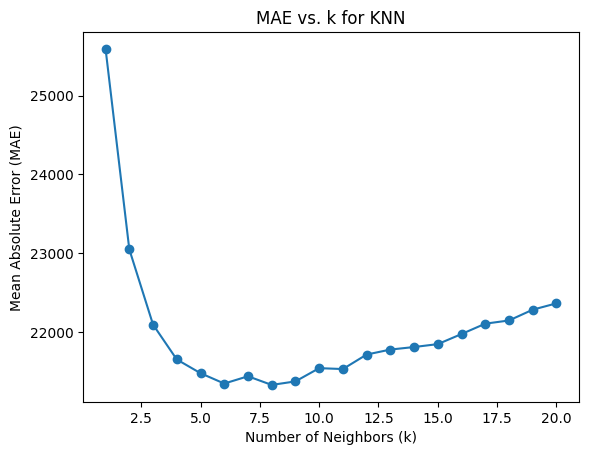

Optimal k value: 8


In [18]:
def Mean_Absolute_Price_Error(y_true, y_pred):
    y_true_price = np.exp(y_true)
    y_pred_price = np.exp(y_pred)
    return mean_absolute_error(y_true_price, y_pred_price)

mae_scorer = make_scorer(Mean_Absolute_Price_Error, greater_is_better=False)
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsRegressor(metric='manhattan'), param_grid, cv=5, scoring=mae_scorer)
grid_search.fit(X_train_scaled, y_train)

results = grid_search.cv_results_
plt.plot(param_grid['n_neighbors'], -results['mean_test_score'], marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. k for KNN')
plt.show()

best_k = grid_search.best_params_['n_neighbors']
print("Optimal k value:", best_k)

13. **Refit the Model (5 points)**
    - Refit the KNN model using the optimal `k` value from Problem 12. Print the out-of-sample performance (R2) of this final model.

In [19]:
final_knn_model = KNeighborsRegressor(n_neighbors=best_k, metric='manhattan')
final_knn_model.fit(X_train_scaled, y_train)
y_final_predict = final_knn_model.predict(X_test_scaled)
final_osr2 = r2_score(y_test, y_final_predict)
print("Final OSR2 with optimal k:", final_osr2)


Final OSR2 with optimal k: 0.7966170709677483
